In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import re
import os
from matplotlib import gridspec
import scipy.stats as stats
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib import rcParams 
# from matplotlib import style
from matplotlib.colors import ListedColormap # control color in seaborn heatmap
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.patheffects as path_effects
import itertools

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
palms=pd.read_csv('../data_files/palms_alltraits_curated_20220620.csv',sep='\t')
palms.groupby(by='shape').count()['species']

shape
bipinnate       16
cospalmate     455
entire         108
pinnate       1405
variable       140
Name: species, dtype: int64

In [3]:
list(palms.columns)
palms['UnderstoreyCanopy'].unique()
palms['UnderstoreyCanopy'].replace('canopy',1,inplace=True)
palms['UnderstoreyCanopy'].replace('understorey',0,inplace=True)
palms['UnderstoreyCanopy'].unique()

array([ 1.,  0., nan])

In [4]:
vars_names={'CHELSA_ai_stand':'Aridity Index',
'CHELSA_bio10_stand':'Mean daily mean air temperatures of the warmest quarter',
'CHELSA_bio11_stand':'Mean daily mean air temperatures of the coldest quarter',
'CHELSA_bio12_stand':'Annual precipitation',
'CHELSA_bio13_stand':'Precipitation amount of the wettest month',
'CHELSA_bio14_stand':'Precipitation amount of the driest month',
'CHELSA_bio15_stand':'Precipitation seasonality',
'CHELSA_bio16_stand':'Mean monthly precipitation amount of the wettest quarter',
'CHELSA_bio17_stand':'Mean monthly precipitation amount of the driest quarter',
'CHELSA_bio18_stand':'Mean monthly precipitation amount of the warmest quarter',
'CHELSA_bio19_stand':'Mean monthly precipitation amount of the coldest quarter',
'CHELSA_bio1_stand':'Mean annual air temperature',
'CHELSA_bio2_stand':'Mean diurnal air temperature range',
'CHELSA_bio3_stand':'Isothermality',
'CHELSA_bio4_stand':'Temperature seasonality',
'CHELSA_bio5_stand':'Mean daily maximum air temperature of the warmest month',
'CHELSA_bio6_stand':'Mean daily minimum air temperature of the coldest month',
'CHELSA_bio7_stand':'Annual range of air temperature',
'CHELSA_bio8_stand':'Mean daily mean air temperatures of the wettest quarter',
'CHELSA_bio9_stand':'Mean daily mean air temperatures of the driest quarter',
'CHELSA_cmi_max_stand':'Maximum monthly climate moisture index',
'CHELSA_cmi_mean_stand':'Mean monthly climate moisture index',
'CHELSA_cmi_min_stand':'Minimum monthly climate moisture index',
'CHELSA_cmi_range_stand':'Range monthly climate moisture index',
'CHELSA_fcf_stand':'Frost change frequency',
'CHELSA_gdd0_stand':'Growing degree days heat sum above 0\u2103',
'CHELSA_gdgfgd0_stand':'First growing degree day above 0\u2103',
'CHELSA_gsl_stand':'Growing season length TREELIM',
'CHELSA_gst_stand':'Mean temperature of the growing season TREELIM',
'CHELSA_hurs_max_stand':'Maximum monthly nearsurface relative humidity',
'CHELSA_hurs_min_stand':'Minimum monthly nearsurface relative humidity',
'CHELSA_hurs_range_stand':'Range monthly nearsurface relative humidity',
'CHELSA_lgd_stand':'Last day of the growing season TREELIM',
'CHELSA_ngd0_stand':'Number of growing degree days',
'CHELSA_npp_stand':'Net primary productivity',
'CHELSA_vpd_max_stand':'Maximum monthly vapor pressure deficit',
'CHELSA_vpd_mean_stand':'Mean monthly vapor pressure deficit',
'CHELSA_vpd_min_stand':'Minimum monthly vapor pressure deficit',
'Simard_Pinto_3DGlobalVeg_JGR_stand':'Forest canopy height',
'MaxStemHeight_m_stand':'Maximum stem height',
'MaxStemDia_cm_stand':'Maximum stem diameter',
'MaxLeafNumber_stand':'Maximum leaf number',
'Max_Blade_Length_m_stand':'Maximum blade length',
'Max_Rachis_Length_m_stand':'Maximum rachis length',
'Max_Petiole_length_m_stand':'Maximum petiole length',
'StemHeightBladeLength_stand':'Plant height',
'HeightOverCanopy_stand':'Height over canopy',
'UnderstoreyCanopy':'Understory/Canopy'}

all_variables=palms[vars_names.keys()]
np.random.seed(666)
all_rho, all_pval=stats.spearmanr(all_variables,axis=0,nan_policy='omit')
print(all_pval)

[[0.00000000e+000 2.00598895e-004 2.68524517e-017 ... 1.27705000e-003
  2.73727408e-031 5.14581305e-001]
 [2.00598895e-004 0.00000000e+000 3.81837404e-246 ... 8.72198670e-001
  8.02940272e-010 8.08361985e-001]
 [2.68524517e-017 3.81837404e-246 0.00000000e+000 ... 8.48310184e-001
  4.37239593e-002 9.53801649e-001]
 ...
 [1.27705000e-003 8.72198670e-001 8.48310184e-001 ... 0.00000000e+000
  2.18297189e-312 0.00000000e+000]
 [2.73727408e-031 8.02940272e-010 4.37239593e-002 ... 2.18297189e-312
  0.00000000e+000 5.94977408e-137]
 [5.14581305e-001 8.08361985e-001 9.53801649e-001 ... 0.00000000e+000
  5.94977408e-137 0.00000000e+000]]


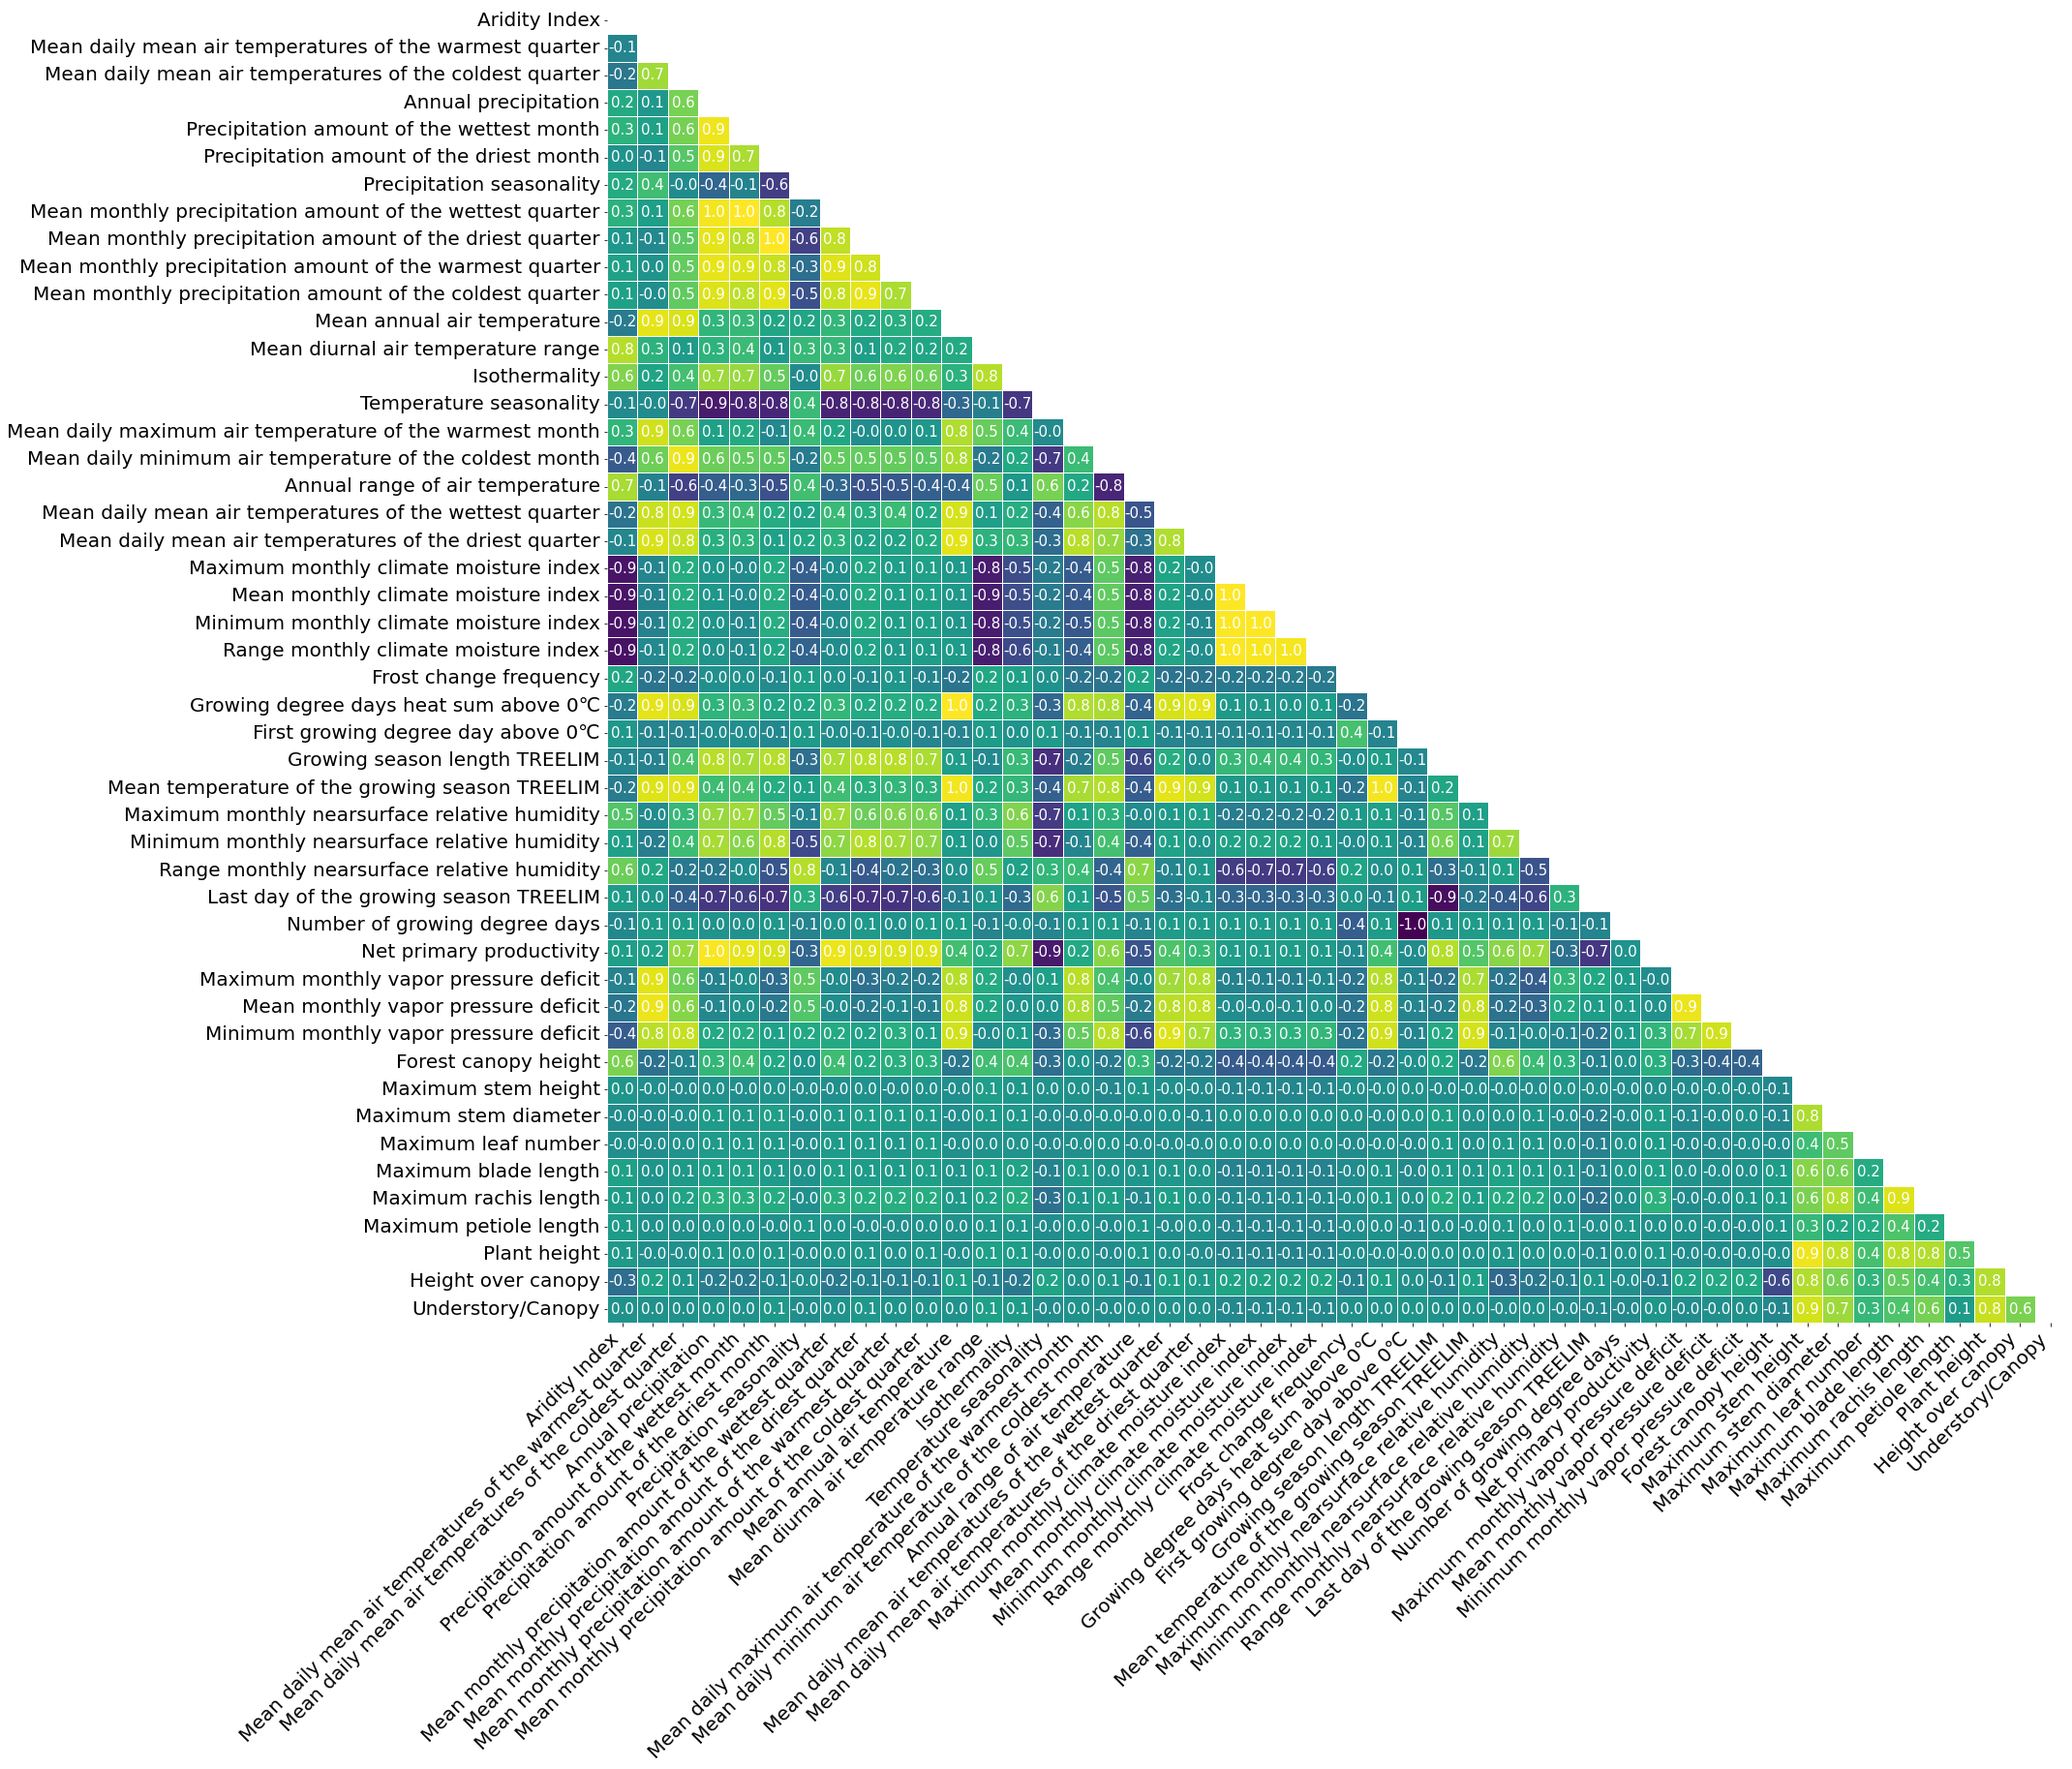

In [43]:
fig,ax=plt.subplots(figsize=(27,25),facecolor='w')

labelcolor='#4f4f4f'

mask=np.zeros_like(all_rho, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

hm=sns.heatmap(all_rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=vars_names.values(),
            yticklabels=vars_names.values(),ax=ax,cbar=False,
           annot=True,fmt='.1f',annot_kws={'fontsize':15,'color':'#ffffff'}, # 'fontweight':'bold' #e3e3e3
           mask=mask) # mask=all_rho<0.6,

hm.set_xticklabels(hm.get_xticklabels(), rotation=45,fontdict={'fontsize':20,'verticalalignment':'top','horizontalalignment':'right'}) #horizontalalignment
hm.set_yticklabels(hm.get_yticklabels(), rotation=0,fontdict={'fontsize':20,'verticalalignment':'center'}) #[ 'center' | 'top' | 'bottom' | 'baseline' ]

# plt.savefig('../figures//Cor_allvariables_20220812.pdf',dpi=300,bbox_inches='tight')
# plt.savefig('../figures//Cor_allvariables_20220812.svg',dpi=300,bbox_inches='tight')
plt.show()

In [6]:
rhopd=pd.DataFrame(all_rho, columns=vars_test, index=vars_test)

cor_vars={}
for col in rhopd.columns:
    correlates=[]
    for index,row in rhopd[col].items():
        if row == 1:
            pass
        elif 0.7 <= row:
            print('%s is correlated with %s, coefficient %.2f'%(col, index, row))
            correlates.append(index)
        elif -0.7 >= row:
            print('%s is correlated with %s, coefficient %.2f'%(col, index, row))
            correlates.append(index)
    cor_vars[col]=correlates
cor_vars

CHELSA_ai_stand is correlated with CHELSA_bio2_stand, coefficient 0.77
CHELSA_ai_stand is correlated with CHELSA_bio7_stand, coefficient 0.74
CHELSA_ai_stand is correlated with CHELSA_cmi_max_stand, coefficient -0.89
CHELSA_ai_stand is correlated with CHELSA_cmi_mean_stand, coefficient -0.89
CHELSA_ai_stand is correlated with CHELSA_cmi_min_stand, coefficient -0.89
CHELSA_ai_stand is correlated with CHELSA_cmi_range_stand, coefficient -0.91
CHELSA_bio10_stand is correlated with CHELSA_bio11_stand, coefficient 0.71
CHELSA_bio10_stand is correlated with CHELSA_bio1_stand, coefficient 0.92
CHELSA_bio10_stand is correlated with CHELSA_bio5_stand, coefficient 0.85
CHELSA_bio10_stand is correlated with CHELSA_bio8_stand, coefficient 0.83
CHELSA_bio10_stand is correlated with CHELSA_bio9_stand, coefficient 0.88
CHELSA_bio10_stand is correlated with CHELSA_gdd0_stand, coefficient 0.92
CHELSA_bio10_stand is correlated with CHELSA_gst_stand, coefficient 0.89
CHELSA_bio10_stand is correlated with

{'CHELSA_ai_stand': ['CHELSA_bio2_stand',
  'CHELSA_bio7_stand',
  'CHELSA_cmi_max_stand',
  'CHELSA_cmi_mean_stand',
  'CHELSA_cmi_min_stand',
  'CHELSA_cmi_range_stand'],
 'CHELSA_bio10_stand': ['CHELSA_bio11_stand',
  'CHELSA_bio1_stand',
  'CHELSA_bio5_stand',
  'CHELSA_bio8_stand',
  'CHELSA_bio9_stand',
  'CHELSA_gdd0_stand',
  'CHELSA_gst_stand',
  'CHELSA_vpd_max_stand',
  'CHELSA_vpd_mean_stand',
  'CHELSA_vpd_min_stand'],
 'CHELSA_bio11_stand': ['CHELSA_bio10_stand',
  'CHELSA_bio1_stand',
  'CHELSA_bio6_stand',
  'CHELSA_bio8_stand',
  'CHELSA_bio9_stand',
  'CHELSA_gdd0_stand',
  'CHELSA_gst_stand',
  'CHELSA_vpd_min_stand'],
 'CHELSA_bio12_stand': ['CHELSA_bio13_stand',
  'CHELSA_bio14_stand',
  'CHELSA_bio16_stand',
  'CHELSA_bio17_stand',
  'CHELSA_bio18_stand',
  'CHELSA_bio19_stand',
  'CHELSA_bio3_stand',
  'CHELSA_bio4_stand',
  'CHELSA_gsl_stand',
  'CHELSA_hurs_min_stand',
  'CHELSA_npp_stand'],
 'CHELSA_bio13_stand': ['CHELSA_bio12_stand',
  'CHELSA_bio14_stand',


**Variables that for our hypothesis should go:**

- **Aridity (CHELSA_ai)** ~~mean annual air temperature (bio2) nor annual range of air temperature (bio7) climatic moisture index~~

- **Plant height** ~~MaxStemHeight_m MaxStemDia_cm Max_Blade_Length_m UnderstoreyCanopy~~ Max_Rachis_Length_m HeightOverCanopy_stand

- **HeightOverCanopy_stand**

- **Rachis lenght** ~~MaxStemDia_cm Max_Blade_Length_m~~ StemHeightBladeLength

- **Temperature bio1** (any) ~~mean daily maximum air temperture of the warmest month (bio5) mean daily minimum air temperature of the coldest month (bio6) annual range of air temperature (bio7) mean daily mean air tempertures of the wettest quarter (bio8) mean daily maximum air temperture of the warmest month (bio10) mean daily mean air tempertures of the driest quarter (bio9) mean daily mean air tempertures of the coldest quarter (bio11) Number of days above 0 (dgg0) Mean temperature of the growing season TREELIM (gst) vapour pressure deficit (vpd)~~

- **Temperature seasonality** bio4 (any) Precipitation bio12 ~~precipitation amount of the wettest month (bio13) precipitation amount of the driest month (bio14) mean monthly precipitation amount of the wettest quarter (bio16) mean monthly precipitation amount of the driest quarter (bio17) mean monthyl precipitation amount of the warmest quarter (bio18) mean monthly precipitation amount of the warmest quarter (bio19) growing season length TREELIM (gsl) near-surface relative humidity (hurs) CHELSA_npp~~

- **Precipitation bio12** (any) ~~isothermality (bio3) mean diurnal air temperature range (bio2) precipitation amount of the wettest month (bio13) precipitation amount of the driest month (bio14) mean monthly precipitation amount of the wettest quarter (bio16) mean monthly precipitation amount of the driest quarter (bio17) mean monthyl precipitation amount of the warmest quarter (bio18) mean monthly precipitation amount of the warmest quarter (bio19)~~ Temperature seasonality (bio4)

- **Precipitation seasonality bio15** (any) ~~CHELSA_hurs_range~~

**Hypothesis 1a: temperature has a stronger effect on leaf shape than other variables (evaluating temp. seasonality instead of precipitation and plant height instead of canopy/understory proxy)**

entire|pinnate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+plantHeight
entire|palmate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+plantHeight
palmate|pinnate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+plantHeight

**Hypothesis 1b: temperature has a stronger effect on leaf shape than other variables (evaluating precipitation instead of temp. seasonality and plant height instead of canopy/understory proxy)**

entire|pinnate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+plantHeight
entire|palmate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+plantHeight
palmate|pinnate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+plantHeight

**Hypothesis 1c: temperature has a stronger effect on leaf shape than other variables (evaluating temp. seasonality instead of precipitation and canopy/understory instead of plant height)**

entire|pinnate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+HeightOverCanopy
entire|palmate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+HeightOverCanopy
palmate|pinnate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+HeightOverCanopy

**Hypothesis 1d: temperature has a stronger effect on leaf shape than other variables (evaluating precipitation instead of temp. seasonality and canopy/understory instead of plant height)**

entire|pinnate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+HeightOverCanopy
entire|palmate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+HeightOverCanopy
palmate|pinnate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+HeightOverCanopy

**Hypothesis 2a: rachis lenght and canopy/understory matter more than temperature (evaluating temp. seasonality instead of precipitation)**

entire|pinnate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+RachisLength+HeightOverCanopy (could remove since it is more relevant for pinnate|palmate)

entire|palmate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+RachisLength+HeightOverCanopy (could remove since it is more relevant for pinnate|palmate)

palmate|pinnate\~AnnualMeanTemp+TempSeasonality+PrecSeasonality+RachisLength+HeightOverCanopy

**Hypothesis 2b: rachis lenght and canopy/understory matter more than temperature (evaluating precipitation instead of temp. seasonality)**

entire|pinnate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+RachisLength+HeightOverCanopy (could remove since it is more relevant for pinnate|palmate)

entire|palmate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+RachisLength+HeightOverCanopy (could remove since it is more relevant for pinnate|palmate)

palmate|pinnate\~AnnualMeanTemp+AnnualMeanPrecip+PrecSeasonality+RachisLength+HeightOverCanopy
<!-- #### 18 x 3 = 54 -->

In [7]:
selected=['CHELSA_ai_stand','StemHeightBladeLength_stand','Max_Rachis_Length_m_stand','HeightOverCanopy'
          'CHELSA_bio1_stand','CHELSA_bio4_stand','CHELSA_bio12_stand','CHELSA_bio15_stand']

In [48]:
all_rho
all_rho_df=pd.DataFrame(all_rho,columns=[x for x in vars_names.keys()],index=[x for x in vars_names.keys()])
all_rho_df_sel=all_rho_df.loc[sorted(selected),sorted(selected)].copy(deep=True)
all_rho_df_sel

,CHELSA_ai_stand,CHELSA_bio12_stand,CHELSA_bio15_stand,CHELSA_bio1_stand,CHELSA_bio4_stand,HeightOverCanopy_stand,Max_Rachis_Length_m_stand,StemHeightBladeLength_stand
CHELSA_ai_stand,1.000000,0.217458,0.219631,-0.169813,-0.050606,-0.285642,0.109104,0.080636
CHELSA_bio12_stand,0.217458,1.000000,-0.350843,0.305094,-0.857512,-0.156626,0.269090,0.055799
CHELSA_bio15_stand,0.219631,-0.350843,1.000000,0.180150,0.356788,-0.003925,-0.005126,-0.005995
CHELSA_bio1_stand,-0.169813,0.305094,0.180150,1.000000,-0.330627,0.124962,0.083680,-0.001508
CHELSA_bio4_stand,-0.050606,-0.857512,0.356788,-0.330627,1.000000,0.164740,-0.251948,-0.022210
HeightOverCanopy_stand,-0.285642,-0.156626,-0.003925,0.124962,0.164740,1.000000,0.410988,0.769688
Max_Rachis_Length_m_stand,0.109104,0.269090,-0.005126,0.083680,-0.251948,0.410988,1.000000,0.772736
StemHeightBladeLength_stand,0.080636,0.055799,-0.005995,-0.001508,-0.022210,0.769688,0.772736,1.000000


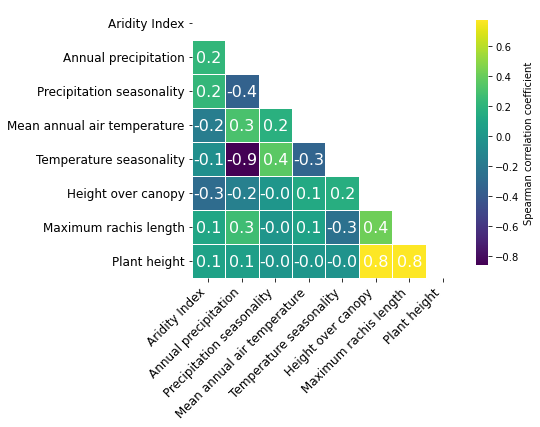

In [61]:
fig,ax=plt.subplots(figsize=(6,5),facecolor='w')

labelcolor='#4f4f4f'

mask=np.zeros_like(all_rho_df_sel, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

hm=sns.heatmap(all_rho_df_sel,cmap='viridis',linewidths=1,linecolor='white',
               xticklabels=[vars_names[x] for x in all_rho_df_sel.columns],
               yticklabels=[vars_names[x] for x in all_rho_df_sel.index],ax=ax,cbar=True,
               annot=True,fmt='.1f',annot_kws={'fontsize':16,'color':'#ffffff'},
               cbar_kws={'shrink':0.9,'label':'Spearman correlation coefficient'},
               mask=mask)

hm.set_xticklabels(hm.get_xticklabels(), rotation=45,fontdict={'fontsize':12,'verticalalignment':'top','horizontalalignment':'right'}) #horizontalalignment
hm.set_yticklabels(hm.get_yticklabels(), rotation=0,fontdict={'fontsize':12,'verticalalignment':'center'}) #[ 'center' | 'top' | 'bottom' | 'baseline' ]

# for tick,color in zip(ax.get_xticklabels(),all_rho_df_sel.columns):
#     tick.set_color(labelcolor)
# for tick,color in zip(ax.get_yticklabels(),all_rho_df_sel.index):
#     tick.set_color(labelcolor)

# plt.savefig('../figures/Corr_selectedvariables_20220812.pdf',dpi=300,bbox_inches='tight')
plt.show()

### Variance inflation factor

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [8]:
selected=['CHELSA_ai_stand','StemHeightBladeLength_stand','Max_Rachis_Length_m_stand','HeightOverCanopy_stand',
          'CHELSA_bio1_stand','CHELSA_bio4_stand','CHELSA_bio12_stand','CHELSA_bio15_stand']

varselected=palms[selected]
varselected

vif=pd.DataFrame(columns=selected,index=selected+['Intercept'])
for col in varselected.columns:
    corrs=list(varselected.columns)
    corrs.remove(col)
    correlates = "+".join(corrs)
    y, X=dmatrices('%s ~'%(col) + correlates, varselected, return_type='dataframe')
    viflist=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    for index in range(len(viflist)):
#         print(viflist[index],list(X.columns)[index])
        vif.loc[list(X.columns)[index],col]=viflist[index]
vif

,CHELSA_ai_stand,StemHeightBladeLength_stand,Max_Rachis_Length_m_stand,HeightOverCanopy_stand,CHELSA_bio1_stand,CHELSA_bio4_stand,CHELSA_bio12_stand,CHELSA_bio15_stand
CHELSA_ai_stand,NaN,1.879162,1.910528,1.289665,1.9099,1.833586,1.886986,1.706551
StemHeightBladeLength_stand,2.397802,NaN,1.105498,2.322134,2.424591,2.431974,2.43853,2.434
Max_Rachis_Length_m_stand,2.428684,1.101353,NaN,2.41093,2.420277,2.429244,2.417983,2.418678
HeightOverCanopy_stand,1.394778,1.968186,2.051138,NaN,1.869419,2.035002,2.023471,2.057811
CHELSA_bio1_stand,1.179147,1.173132,1.175452,1.067176,NaN,1.160507,1.179617,1.154884
CHELSA_bio4_stand,3.667125,3.811835,3.821888,3.763235,3.759367,NaN,1.459686,3.60428
CHELSA_bio12_stand,3.601739,3.647729,3.630607,3.571187,3.646927,1.393088,NaN,3.636304
CHELSA_bio15_stand,1.222443,1.366409,1.362918,1.362972,1.339955,1.290932,1.364665,NaN
Intercept,1.789761,1.129424,1.419201,1.805892,1.81886,1.821034,1.818979,1.819706


 ### doing it for every hypothesis

In [9]:
# testing pinnate vs entire, pinnate vs cospalmate, entire vs cospalmate, entire vs dissected
hp1a=['CHELSA_ai_stand','CHELSA_bio1_stand','CHELSA_bio4_stand',
     'CHELSA_bio15_stand','StemHeightBladeLength_stand']
hp1b=['CHELSA_ai_stand','CHELSA_bio1_stand','CHELSA_bio12_stand',
     'CHELSA_bio15_stand','StemHeightBladeLength_stand']
hp1c=['CHELSA_ai_stand','CHELSA_bio1_stand','CHELSA_bio4_stand',
     'CHELSA_bio15_stand','HeightOverCanopy_stand']
hp1d=['CHELSA_ai_stand','CHELSA_bio1_stand','CHELSA_bio12_stand',
     'CHELSA_bio15_stand','HeightOverCanopy_stand']

# testing pinnates vs palmates
hp2a=['CHELSA_ai_stand','CHELSA_bio1_stand','CHELSA_bio4_stand',
     'CHELSA_bio15_stand','Max_Rachis_Length_m_stand','HeightOverCanopy_stand']
hp2b=['CHELSA_ai_stand','CHELSA_bio1_stand','CHELSA_bio12_stand',
     'CHELSA_bio15_stand','Max_Rachis_Length_m_stand','HeightOverCanopy_stand']

hpths=[hp1a,hp1b,hp1c,hp1d,hp2a,hp2b]

In [10]:
for hyb in [hp1a,hp1b,hp1c,hp1d,hp2a,hp2b]:
    varselected=palms[hyb]

    vif=pd.DataFrame(columns=hyb,index=hyb+['Intercept'])
    for col in varselected.columns:
        corrs=list(varselected.columns)
        corrs.remove(col)
        correlates = "+".join(corrs)
        y, X=dmatrices('%s ~'%(col) + correlates, varselected, return_type='dataframe')
        viflist=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        for index in range(len(viflist)):
    #         print(viflist[index],list(X.columns)[index])
            vif.loc[list(X.columns)[index],col]=viflist[index]
    print(vif)

                            CHELSA_ai_stand CHELSA_bio1_stand  \
CHELSA_ai_stand                         NaN          1.133669   
CHELSA_bio1_stand                  1.044264               NaN   
CHELSA_bio4_stand                  1.252362          1.200461   
CHELSA_bio15_stand                 1.214977          1.326977   
StemHeightBladeLength_stand        1.000527          1.010374   
Intercept                          1.036312          1.036669   

                            CHELSA_bio4_stand CHELSA_bio15_stand  \
CHELSA_ai_stand                      1.182214           1.053496   
CHELSA_bio1_stand                    1.043851           1.059869   
CHELSA_bio4_stand                         NaN           1.041276   
CHELSA_bio15_stand                   1.133619                NaN   
StemHeightBladeLength_stand          1.010256           1.010109   
Intercept                            1.036665            1.03666   

                            StemHeightBladeLength_stand  
CHELSA_ai

In [13]:
vif[vif['testing_var']=='CHELSA_bio1_stand']

fig,ax=plt.subplots(figsize=(10,10),facecolor='w')

hm=sns.heatmap(vif,cmap='viridis',linewidths=1,linecolor='white',xticklabels=vif.columns,yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,fmt='.1f',annot_kws={'fontsize':15,'color':'#e3e3e3','fontweight':'bold'})
sns.heatmap(all_rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,mask=all_rho<0.6,fmt='.1f',annot_kws={'fontsize':15,'color':'#787878','fontweight':'bold'})

hm.set_xticklabels(hm.get_xticklabels(), rotation=90,fontdict={'fontsize':18,'verticalalignment':'top'}) #horizontalalignment
hm.set_yticklabels(hm.get_yticklabels(), rotation=0,fontdict={'fontsize':18,'verticalalignment':'center'}) #[ 'center' | 'top' | 'bottom' | 'baseline' ]

# plt.savefig('./Cor_allvariables.pdf',dpi=300,bbox_inches='tight')
plt.show()

### produce R scripts

files **Clean_1_42presampled.trees** and **palms_alltraits_curated_20220620.csv** must be in the same folder where the R code is executed

In [6]:
hpthsname=['hp1a','hp1a','hp1a', #there are clever ways to do this but I am in a rush
           'hp1b','hp1b','hp1b',
           'hp1c','hp1c','hp1c',
           'hp1d','hp1d','hp1d',
           'hp2a','hp2a','hp2a',
           'hp2b','hp2b','hp2b']

shapes_pairwise=['cospalmate','pinnate','entire']
path=os.getcwd()

# replace with index=0 and -1 at the end of the files for chains no. 1
# parallelization is at the tree level, not the chain level
# this is due to the weird possible time+node/cores combinations in the cluster I work with
# it is more efficient this way though it is, yes, weird.
a=0
index=18 # 18
rounds=2 # 2 # chain one or two

for hyp in hpths:
    for shape in itertools.combinations(shapes_pairwise, 2):
#         print(shape[0],shape[1])
#         open file to write
        file=open(os.path.join('%s/Rscripts/'%(path),'Index%03d_Shape-%s_vs_%s_%s.R'%(index,shape[0],shape[1],hpthsname[a])),'a')
# #####################################################
#         write code for R
        file.write('library(ape)\n')
        file.write('library(phytools)\n')
        file.write('library(MCMCglmmRAM)\n')
        file.write('library(dplyr)\n')
        file.write('library(foreach)\n')
        file.write('library(doParallel)\n')
        
        file.write('numCores <- detectCores()\n')
        file.write('numCores\n')
        file.write('registerDoParallel(numCores)\n')

        
#         defines function for handling columns in the data
        file.write('completeFun <- function(data, desiredCols) {\n')
        file.write('\tcompleteVec <- complete.cases(data[, desiredCols])\n')
        file.write('\treturn(data[completeVec, ])\n')
        file.write('}\n')

        file.write('dataall<-read.csv("./palms_alltraits_curated_20220620.csv",quote="",sep="\\t",header=TRUE)\n')

        file.write('posdis42<-read.tree("./Clean_1_42presampled.trees")\n')
#         creates temp dataframe with selected variables considered per hypothesis
        file.write('data_pre<-completeFun(dataall,c(%s))\n'%(str(hyp).strip('[').strip(']')))
#         filter dataset to select the two shapes.
        file.write('data_%s<-filter(data_pre, %s_binomial == "True" | %s_binomial == "True")\n'%(hpthsname[a],shape[0],shape[1]))
        file.write('rownames(data_%s) <- data_%s$tip_name\n'%(hpthsname[a],hpthsname[a]))
#         shape columns coded as 1|0 are converted to factors
        file.write('data_%s$%s_binomial<-factor(data_%s$%s_binomial)\n'%(hpthsname[a],shape[0],hpthsname[a],shape[0]))
#         numeric data is converted to numeric
        for var in hyp:
            file.write('data_%s$%s<-as.numeric(data_%s$%s)\n'%(hpthsname[a],var,hpthsname[a],var))
        file.write('tree1<-posdis42[[1]]\n')
        file.write('missingspp<-setdiff(sort(tree1$tip.label),sort(data_%s$tip_name))\n'%(hpthsname[a]))
        
        file.write('data_%s$animal <- factor(data_%s$tip_name)\n'%(hpthsname[a],hpthsname[a])) ## species_python changed to tip_species
        file.write('Nburn <- 1000\n')
        file.write('Nnitt <- 15000000\n')
        file.write('Nthin <- 8000\n')
        file.write('k <- 2\n')
        file.write('I <- diag(k-1)\n')
        file.write('J <- matrix(rep(1, (k-1)^2), c(k-1, k-1))\n')

        file.write('priors<-list(R=list(V=(1/k)*(I+J), fix=1), G=list(G1=list(V=diag(k-1), nu=0.002)))\n')
        file.write('n_tree=42\n')
        file.write('packages=c("ape","phytools","MCMCglmmRAM","dplyr")\n')

        file.write('%s_postdist <-c()\n'%(hpthsname[a]))

        file.write('%s_postdist <- foreach(i=1:n_tree, .combine=rbind, .packages=packages) %%dopar%% {\n'%(hpthsname[a]))
        file.write('\ttree2<-drop.tip(posdis42[[i]],c(missingspp))\n')
        file.write('\tmodel%s<- MCMCglmm(%s_binomial~%s,\n'
                   %(hpthsname[a],shape[0],str(hyp).strip('[').strip(']').strip('\'').replace('\', \'','+')))
        file.write('\t\t\trandom = ~animal,\n')
        file.write('\t\t\tdata = data_%s,\n'%(hpthsname[a]))
        file.write('\t\t\treduced = TRUE,\n')
        file.write('\t\t\tpedigree = tree2,\n')
        file.write('\t\t\tfamily = "threshold",\n')
        file.write('\t\t\tprior = priors,\n')
        file.write('\t\t\tverbose = TRUE,\n')
        file.write('\t\t\tburnin = Nburn, nitt = Nnitt, thin = Nthin,\n')
        file.write('\t\t\tpr = TRUE, pl = TRUE, saveX = TRUE,  saveZ = TRUE)\n')
        file.write('\t%s_postdist<-rbind(%s_postdist,model%s$Sol)\n'%(hpthsname[a],hpthsname[a],hpthsname[a]))
#         file.write('\twrite.table(%s_postdist,"./Shape-%s_vs_%s_%s_postdist-%s.txt",sep="\\t")\n'%(hpthsname[a],shape[0],shape[1],hpthsname[a],rounds))
        file.write('}\n')
        
        file.write('write.table(%s_postdist,"./Shape-%s_vs_%s_%s_postdist-%s.txt",sep="\\t")\n'%(hpthsname[a],shape[0],shape[1],hpthsname[a],rounds))
        file.write('save.image("./Shape-%s_vs_%s_%s-%s.Rimage")\n'%(shape[0],shape[1],hpthsname[a],rounds))
        file.close()
        a+=1
        index+=1

In [ ]:
# seds
# Calamus_batoensis == Lanonia_batoensis
# Calamus_scapigerus == Calamus_scapiger
# Geonoma_longipedunculata == Geonoma_longepedunculata
# Linospadix_monostachyos == Linospadix_monostachyus
# Licuala_manglaensis == Lanonia_manglaensis